In [11]:
from imad_nb.src.naive_bayes import NaiveBayes, GaussianNaiveBayes, MixedNaiveBayes
import pandas as pd
import numpy as np
from imad_nb.src.evaluators import MetricsEvaluator
from numbers import Number


import warnings
warnings.filterwarnings("ignore")

# Data Preparation

In [27]:
def download_data(data_name):
    if data_name=='abalone':
        columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight','Class']
        data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', 
                           names=columns)
    if data_name == 'balance':
        columns = ['Class', 'LeftWeight', 'LeftDist', 'RightWeight', 'RightDist']
        data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',
                           names=columns)
 
    data.Class = data.Class.factorize()[0]
    return data

In [32]:
DATASET = 'balance'
#DATASET = 'abalone'

In [69]:
data = download_data(DATASET)
data = data.sample(frac=1)
columns = list(data.columns)
print(len(data))
print(columns)
#data.Class = (data.Class/3).astype(int)

625
['Class', 'LeftWeight', 'LeftDist', 'RightWeight', 'RightDist']


In [70]:
split = int(.8*len(data))
train_data = data.loc[:split,:]
test_data = data.loc[split:,:]

print(len(train_data),',', len(test_data), data.Class.nunique())

513 , 113 3


# Naive Bayes prep + training

In [71]:
#naivebayes = NaiveBayes(zero_frequency_fill=True)
naivebayes = GaussianNaiveBayes()


#naivebayes = (MixedNaiveBayes([1,2,3,4,5,6,7], True) 
#              if DATASET is 'abalone' else NaiveBayes(True))

if type(naivebayes)==GaussianNaiveBayes:
    columns = [c for c in columns if isinstance(data.loc[0,c], Number)]
    train_data = train_data[columns]
    test_data = test_data[columns]
    data = data[columns]
    print('dropped non numeric columns')

naivebayes.train(train_data[[c for c in columns if c is not 'Class']].values, 
                 train_data['Class'].values)

dropped non numeric columns


In [72]:
train_metrics = MetricsEvaluator(train_data[[c for c in columns if c is not 'Class']].values, 
                                 train_data['Class'].values, 
                                 naivebayes, data.Class.nunique())
test_metrics = MetricsEvaluator(test_data[[c for c in columns if c is not 'Class']].values, 
                                test_data['Class'].values, 
                                naivebayes, data.Class.nunique())

In [73]:
print('Accuracy:\t', train_metrics.accuracy())
print('Precision:\t', train_metrics.precision())
print('Recall :\t', train_metrics.recall())
print('Fmeasure:\t', train_metrics.f_measure())

Accuracy:	 0.910331384016
Precision:	 0.839531926563
Recall :	 0.910331384016
Fmeasure:	 0.873451789157


In [74]:
print('Accuracy:\t', test_metrics.accuracy())
print('Precision:\t', test_metrics.precision())
print('Recall :\t', test_metrics.recall())
print('Fmeasure:\t', test_metrics.f_measure())

Accuracy:	 0.902654867257
Precision:	 0.832651318562
Recall :	 0.902654867257
Fmeasure:	 0.865758904068


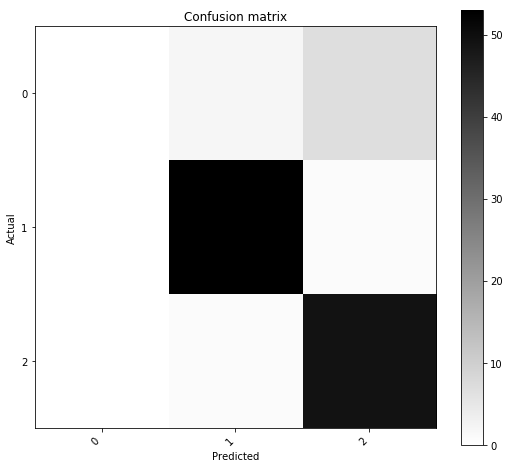

In [75]:
test_metrics.pdml_confusion_matrix().plot()

In [77]:
if DATASET is 'abalone':
    pred_test = naivebayes.predict(test_data[[c for c in columns if c is not 'Class']].values)
    np.sum(np.isclose(pred_test, test_data.Class.values, atol=2))/len(pred_test)